# How to Minimise Churn While Increasing Revenue on your Customer Base

### 1. Introduction 


Before analyzing our database, I will first give a brief introduction of what Churn is and its importance.

Churn is a common problem in the telecommunications business and refers to the percentage of customers who cancel or do not renew their contract with a telecommunications company in a given period. Churn is a very important indicator for telecommunications companies since it is much more expensive to attract new customers than to retain existing ones, so the analysis of company data can help predict and prevent churn.

### 1.1 Causes of Customer Churn

1.-Price: If customers find a more cost-effective solution to the problem they want to solve, they may churn. It is essential to present the added value, so customers feel that the purchase is worth the cost.

2.-Product/Market Fit: When the client realises that they cannot achieve their goals with our solution.

3.-User Experience: If the user experience with the product or application is buggy, and glitchy, for them, they will be less likely to use it on a regular basis and build expertise with it.

4.-Customer experience – If a customer's experience connecting with other aspects of the company, such as customer service, executives, technical support, and installation service, is not positive, the likelihood of churn could increase.
     
### 1.2 Types of Customer Churn


Revenue Churn: This happens when customers downgrade to a cheaper version of our product. 

1.-Competitor Intervention: It is very important to focus on the reason why customers leave the company for our competitors. Are we a bad option for your business? Or is it something we are doing that is driving them away?

2.-Unsuccessful Onboarding: This happens when executives focus only on the sale and not on the right solution for the client as a technology partner.

3.-Desired Feature or Functionality: This happens when we offer all customers the same product, and we do not understand that the product must be adapted to the customer and not the customer to the product.

4.-Company Closure: In these cases, there is not much we can do. But it is essential to have these cases very well-identified in advance and inform our manager.



In this project we will analyze the data we have about Churn, we will study its possible causes and will provide some solutions to reduce Churn and increasing revenue.

# Where did we got the previous causes, we need to reference it

## 2. Data Understanding

### 2.1 Data Dictionary

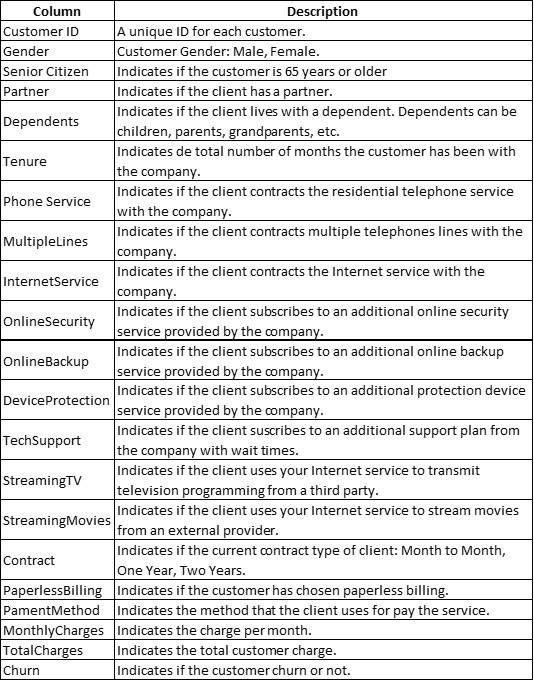

In [1]:
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

### 2.2 Exploratory Data Analysis (EDA)

In [2]:
# Importing libraries for the analysis

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset.
df_churn = pd.read_csv('Telco_Churn.csv')

In [4]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Looking at the first 5 rows and columns of the dataset, we can see a mixture of categorical, and numerical variables to be analyzed.

In [5]:
df_churn.shape
print('The dataset original shape is: ', df_churn.shape) 

The dataset original shape is:  (7043, 21)


In [6]:
#Statistics of numerical variables
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After analysing the descriptive statistics of the numerical values, we appreciate the number of values we have in each row, mean, standard deviation, minimum and maximum values,and the quartiles divided in 25%, 50%, and 75%.


- In each column we have 7043 rows.

- The mean of Senior Citizen is 0.16 which column is binary telling us that tends to 0 (which means No) giving us information that the majority of the people are not Senior Citizens, Tenure's mean is 32.37, but we have to note that tenure is measured monthly, and the mean of monthly charges is around 64.76.

- We can appreciate the different standard deviation values which is a measure of dispertion for explaining variability in the dataset.

- Besides, we have the min, max and quatile values (25th, 50th and 75th percentiles of the data), denoting that the 50th percentile is the median of the data set.

In [7]:
#Statistics of categorical variables
df_churn.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In the description of the categorical variables, we can appreciate the number of rows in each variable (count), how many unique values we have in each variable, the top or mode of each and the frequency in each one.

In [8]:
#Information of the variables
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--", " ", "-"]
df_churn = df_churn.replace(missing_val, pd.NA)

In [10]:
#Showing the percentage of NaN values in each column
NaN_per = (df_churn.isnull().sum()/len(df_churn))*100
NaN_per

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

We have Null Values in the column Total Charges, when we are analyzing the data visualization, we will decide what is the best approach to deal with the missing values.

Let's take look at the target variable.

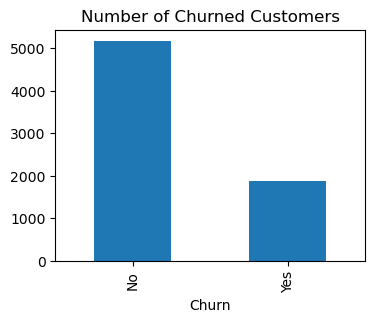

In [11]:
#Bar Plot target variable
target = df_churn.groupby('Churn').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Number of Churned Customers');

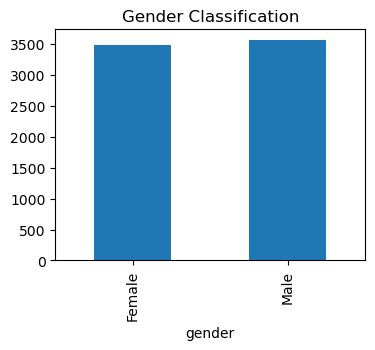

In [25]:
#Bar Plot target variable
target = df_churn.groupby('gender').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Gender Classification');

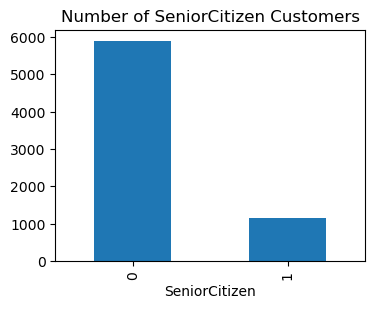

In [15]:
#Bar Plot target variable
target = df_churn.groupby('SeniorCitizen').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Number of SeniorCitizen Customers');

We can see that most of the customers are not Senior Citizen, it means that more of them are nos older adults.

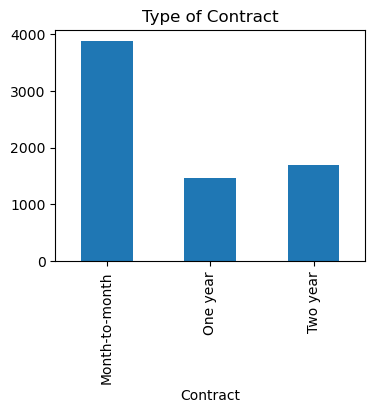

In [16]:
#Bar Plot target variable
target = df_churn.groupby('Contract').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Type of Contract');

We can see that th company have more clients with contracts Month to Month.

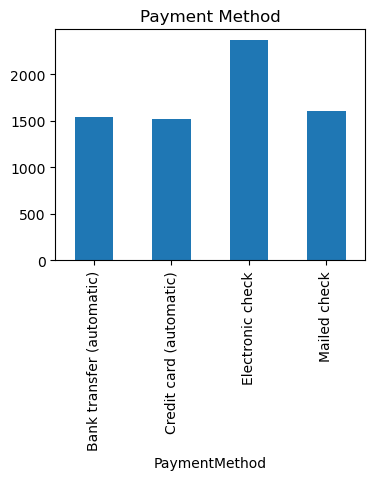

In [17]:
#Bar Plot target variable
target = df_churn.groupby('PaymentMethod').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Payment Method');

We can see that most of the customers do their payments by Electronic Check

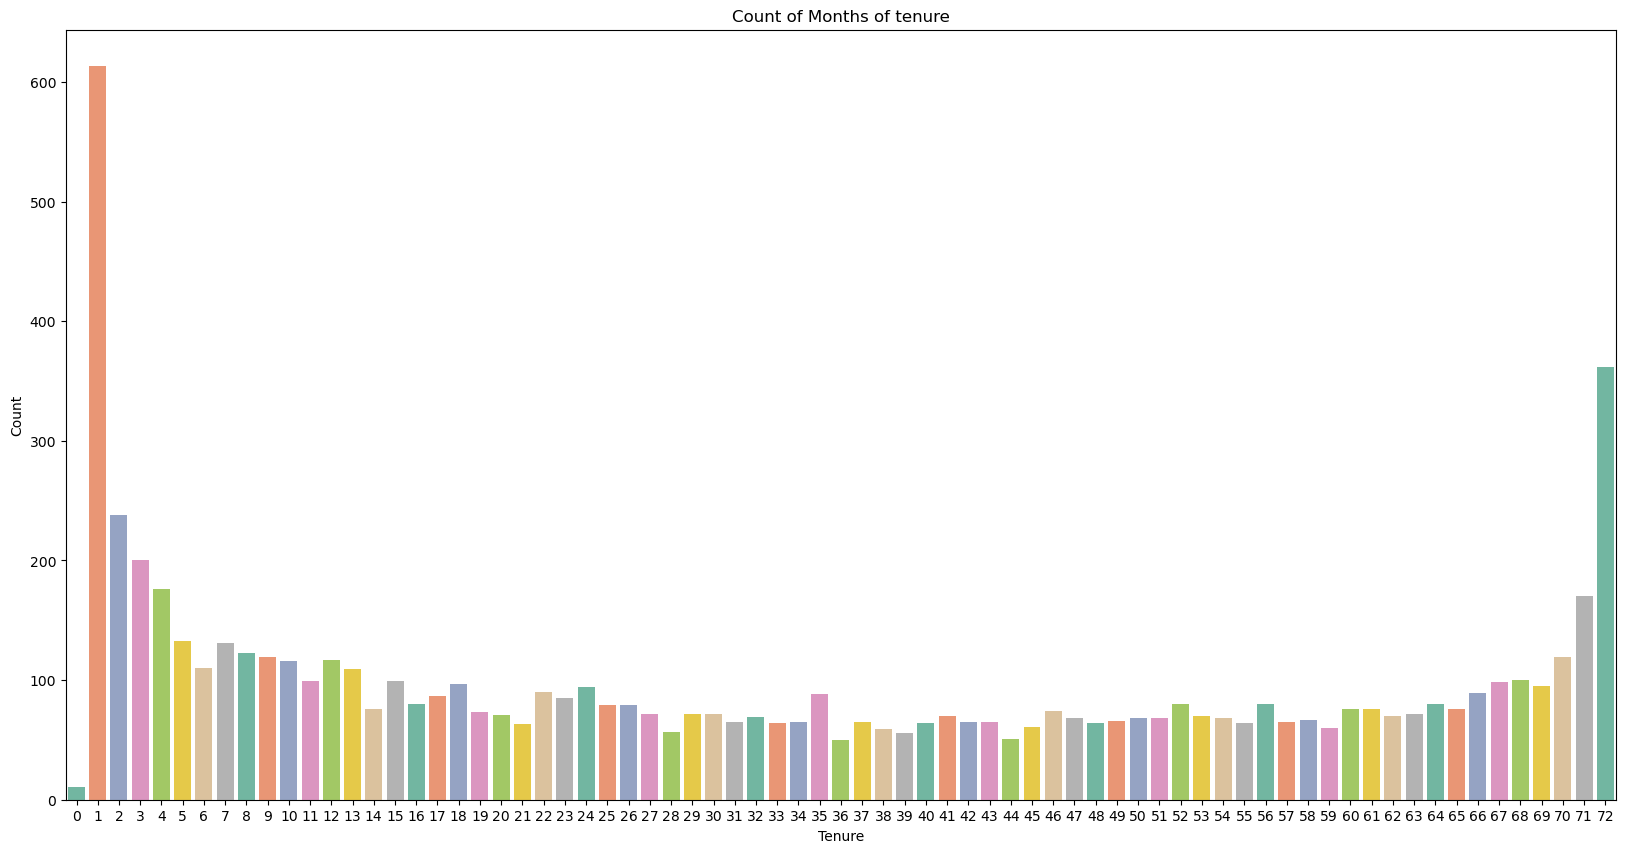

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x='tenure', data=df_churn, palette='Set2')

plt.title('Count of Months of tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.show()

lA COMPA;IA DEBE TRABAJAR MAS PARA RETENER CLIENTES

In [19]:
float_columns = df_churn.select_dtypes(include=['float64']).columns
float_columns

Index(['MonthlyCharges'], dtype='object')

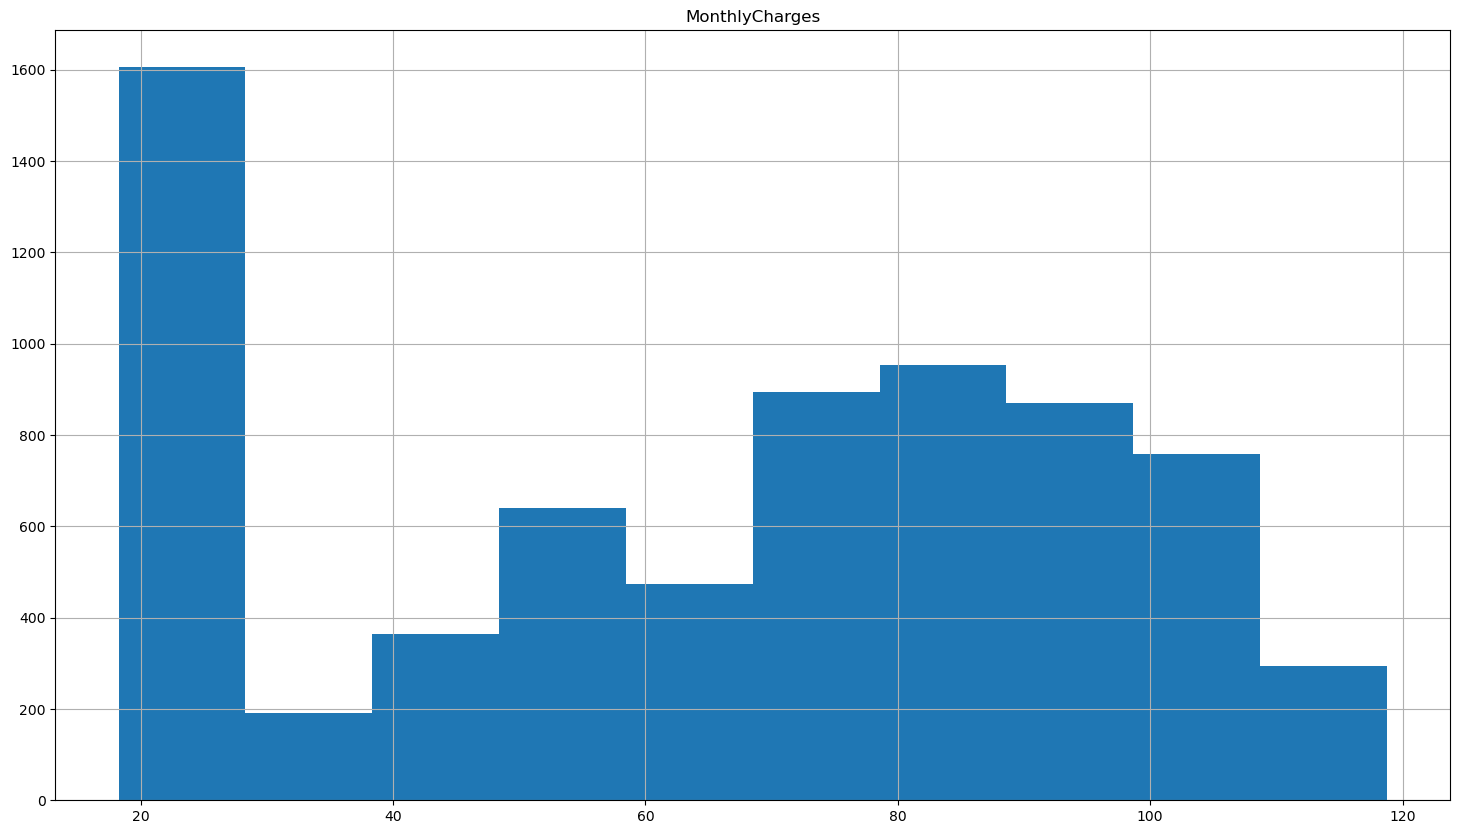

In [20]:
df_churn.hist(['MonthlyCharges'], figsize=(18,10), grid= True);

In [21]:
df_vis=df_churn.copy()

In [22]:
column_to_drop_na = 'TotalCharges'
df_vis = df_vis.dropna(subset=[column_to_drop_na])

In [23]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Data Cleaning and Normalization
